/tmp/ipykernel_3600/3442635460.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ax.set_xticks(pd.date_range(df_civpart['Date'].min(), df_civpart['Date'].max(), freq='5Y'))  # Every 5 years


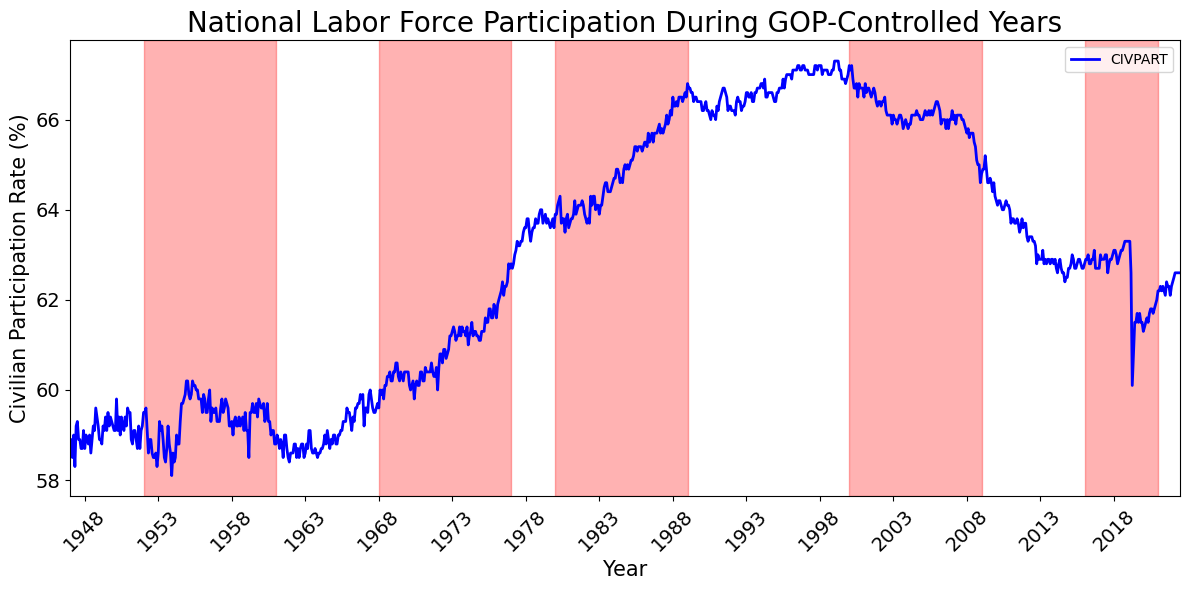

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred
import matplotlib.dates as mdates

# Set up FRED API connection (replace with your actual API key)
fred = Fred(api_key='8770c80e8e192f8eb4e4c7f91096fc47')

# Load the Civilian Participation Rate (CIVPART) data from FRED
temp = fred.get_series('CIVPART', observation_start='1948-01-01', observation_end='2023-07-01')

# Create a DataFrame from the FRED data
df_civpart = pd.DataFrame(data=temp, columns=['CIVPART'])
df_civpart = df_civpart.rename_axis('Date').reset_index()

# Define the GOP control periods (start, end) based on presidential terms
gop_years = [
    (1953, 1961),  # Eisenhower
    (1969, 1977),  # Nixon
    (1981, 1989),  # Reagan
    (2001, 2009),  # Bush
    (2017, 2021)   # Trump
]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Shade the GOP control periods in light red
for start_year, end_year in gop_years:
    ax.axvspan(pd.Timestamp(f'{start_year}-01-01'), pd.Timestamp(f'{end_year}-12-31'), color='red', alpha=0.3)

# Plot the CIVPART data (monthly) as a line plot
ax.plot(df_civpart['Date'], df_civpart['CIVPART'], color='blue', linewidth=2, label='CIVPART')

# Add titles and labels
ax.set_title('National Labor Force Participation During GOP-Controlled Years', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Civilian Participation Rate (%)', fontsize=15)

# Adjust x-axis limits to start at the first date in the data (1948)
ax.set_xlim(df_civpart['Date'].min(), df_civpart['Date'].max())

# Set x-ticks to be every 5 years (for example 1950, 1955, etc.)
ax.set_xticks(pd.date_range(df_civpart['Date'].min(), df_civpart['Date'].max(), freq='5Y'))  # Every 5 years

# Format x-ticks to show only the year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adjust the appearance of ticks
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Add a legend
ax.legend(loc='upper right')

# Tight layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()
